In [1]:
import numpy as np
import cv2

In [2]:
with_mask = np.load('with_mask.npy')
without_mask = np.load('without_mask.npy')

In [3]:
with_mask.shape

(200, 50, 50, 3)

In [4]:
without_mask.shape

(200, 50, 50, 3)

In [5]:
with_mask = with_mask.reshape(200,50 * 50 * 3)
without_mask = without_mask.reshape(200,50 * 50 * 3)

In [6]:
with_mask.shape

(200, 7500)

In [7]:
without_mask.shape

(200, 7500)

In [8]:
X = np.r_[with_mask,without_mask]

In [9]:
X.shape

(400, 7500)

In [10]:
labels = np.zeros(X.shape[0])

In [11]:
labels[200:] = 1.0

In [12]:
YesNo = {0: 'Mask', 1:'No Mask'}

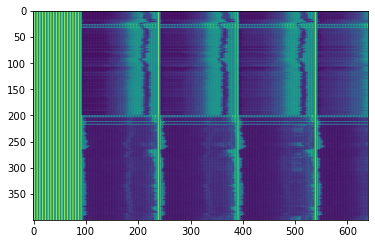

In [13]:
import matplotlib.pyplot as plt
plt.imshow(X[:, 60:700])

# SVM

In [14]:
#svm - Support Vector Machine
#svc - Support Vector Classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [15]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X,labels, test_size = 0.30)

In [29]:
x_train.shape

(280, 7500)

In [30]:
#PCA - Principal Component Analysis
from sklearn.decomposition import PCA

In [31]:
pca = PCA(n_components = 3)
x_train = pca.fit_transform(x_train)

In [32]:
x_train[0]

array([-2.95009696e+03, -6.11757871e-01, -5.10865634e+02])

In [33]:
x_train.shape

(280, 3)

In [34]:
# x_train, x_test, y_train, y_test = train_test_split(X,labels, test_size = 0.20)

In [35]:
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [36]:
x_test = pca.transform(x_test)
y_pred = svm.predict(x_test)

In [37]:
SVM_acscore = accuracy_score(y_test, y_pred)
SVM_acscore

0.9916666666666667

In [26]:
haar_data = cv2.CascadeClassifier('x.xml')

In [27]:
capture = cv2.VideoCapture(0)
data = []
font = cv2.FONT_HERSHEY_COMPLEX
while True:
    flag, img = capture.read()
    if flag:
        faces = haar_data.detectMultiScale(img)
        for x,y,w,h in faces:
            cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,255),4)
            face = img[y:y+h,x:x+w,:]
            face = cv2.resize(face,(50,50))
            face = face.reshape(1,-1)
            face = pca.transform(face)
            pred = svm.predict(face)[0]
            returnValue = YesNo[int(pred)]
            cv2.putText(img, returnValue, (x,y), font, 1, (244,250,250), 2)
            print(returnValue)
        cv2.imshow('result',img)
        if cv2.waitKey(2) == 27:
            break
capture.release()
cv2.destroyAllWindows()

Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No

# KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_trainknn, x_testknn, y_trainknn, y_testknn = train_test_split(X,labels, test_size = 0.25)

In [31]:
x_trainknn.shape

(300, 7500)

In [32]:
from sklearn.decomposition import PCA

In [33]:
pca = PCA(n_components = 2)
x_trainknn = pca.fit_transform(x_trainknn)

In [34]:
x_trainknn[0]

array([-2062.53764356,   -33.83776845])

In [35]:
x_trainknn.shape

(300, 2)

In [36]:
neigh = KNeighborsClassifier()
neigh.fit(x_trainknn, y_trainknn)

KNeighborsClassifier()

In [37]:
x_testknn = pca.transform(x_testknn)
y_predknn = neigh.predict(x_testknn)

In [73]:
KNN_acscore = accuracy_score(y_testknn, y_predknn)
KNN_acscore

0.99

In [39]:
haar_dataknn = cv2.CascadeClassifier('x.xml')

In [40]:
capture = cv2.VideoCapture(0)
data = []
while True:
    flag, img = capture.read()
    if flag:
        faces = haar_dataknn.detectMultiScale(img)
        for x,y,w,h in faces:
            cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,255),4)
            face = img[y:y+h,x:x+w,:]
            face = cv2.resize(face,(50,50))
            face = face.reshape(1,-1)
            face = pca.transform(face)
            predknn = neigh.predict(face)[0]
            returnValue2 = YesNo[int(predknn)]
            print(returnValue2)
        cv2.imshow('result',img)
        if cv2.waitKey(2) == 27:
            break
capture.release()
cv2.destroyAllWindows()

No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask


# Naive Bayes Classifier

In [41]:
#knn - k-nearest neighbors 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_trainNaive, x_testNaive, y_trainNaive, y_testNaive = train_test_split(X,labels, test_size = 0.25)

In [44]:
x_trainNaive.shape

(300, 7500)

In [45]:
#PCA - Principal Component Analysis
from sklearn.decomposition import PCA

In [46]:
pcaNaive = PCA(n_components = 2)
x_trainNaive = pca.fit_transform(x_trainNaive)

In [47]:
x_trainNaive[0]

array([ 1584.59882885, -1318.97918432])

In [48]:
x_trainNaive.shape

(300, 2)

In [49]:
gnb = GaussianNB()
gnb.fit(x_trainNaive, y_trainNaive)

GaussianNB()

In [50]:
x_testNaive = pca.transform(x_testNaive)
y_predNaive = gnb.predict(x_testNaive)

In [74]:
Naive_acscore = accuracy_score(y_testNaive, y_predNaive)
Naive_acscore

1.0

In [52]:
haar_dataNaive = cv2.CascadeClassifier('x.xml')

In [53]:
capture = cv2.VideoCapture(0)
data = []
font = cv2.FONT_HERSHEY_COMPLEX
while True:
    flag, img = capture.read()
    if flag:
        faces = haar_data.detectMultiScale(img)
        for x,y,w,h in faces:
            cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,255),4)
            face = img[y:y+h,x:x+w,:]
            face = cv2.resize(face,(50,50))
            face = face.reshape(1,-1)
            face = pca.transform(face)
            pred = gnb.predict(face)[0]
            n = YesNo[int(pred)]
            cv2.putText(img, n, (x,y), font, 1, (244,250,250), 2)
            print(n)
        cv2.imshow('result',img)
        if cv2.waitKey(2) == 27:
            break
capture.release()
cv2.destroyAllWindows()

No Mask
Mask
No Mask
No Mask
Mask
No Mask
No Mask
Mask
No Mask
No Mask
Mask
No Mask
No Mask
Mask
No Mask
Mask


# Graph for Accuracy Scores

In [55]:
import numpy as np

In [56]:
import matplotlib.pyplot as plt

In [57]:
ac_Scores = [SVM_acscore,KNN_acscore,Naive_acscore]
Algor = ('SVM', 'KNN', 'Naive Bayes')

<BarContainer object of 3 artists>

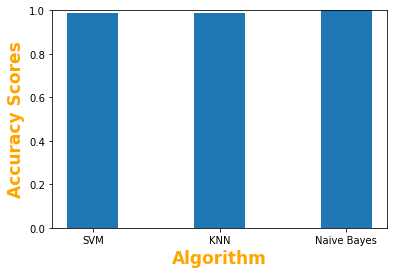

In [114]:
plt.ylim(0,1.0)

plt.xlabel('Algorithm', fontweight='bold', color = 'orange', fontsize='17', horizontalalignment='center')
plt.ylabel('Accuracy Scores', fontweight='bold', color = 'orange', fontsize='17', horizontalalignment='center')
plt.bar(Algor,ac_Scores, width = 0.4)

In [60]:
plt.show()